<center>

# <span style="color:red; font-size:70px;"> Coarse graining</span>

</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from collections import Counter

norm = mcolors.Normalize(vmin=-1, vmax=1)

In [2]:
def coarse_graining(config, dim_clust):

    N1 = int(np.floor(len(config)/dim_clust))
    new_mod = np.zeros(shape = (N1, N1))

    for i in range(0, N1):
        for j in range(0, N1):
            appo = np.sum(config[i * dim_clust : (i+1) * dim_clust, j * dim_clust: (j+1) * dim_clust])

            if appo >= 0:
                new_mod[i][j] = 1
            else:
                new_mod[i][j] = -1

    return new_mod

<center>

# <span style="color:blue; font-size:50px;"> T = 2.0</span>

</center>

In [3]:
conf = np.loadtxt("cg/conf_t2.0.out")
m = np.mean(np.mean(conf))

### Coarse graining

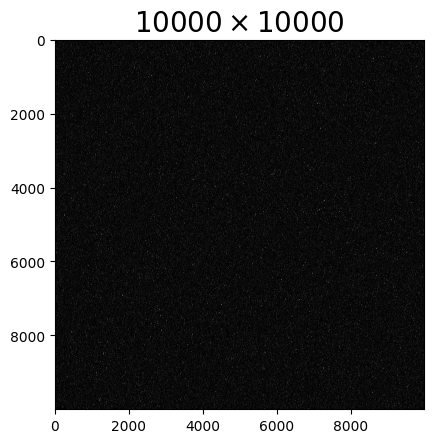

In [4]:
plt.imshow(conf, cmap="binary", norm=norm)
plt.title(r"$10000 \times 10000$", fontsize = 20)

plt.show()

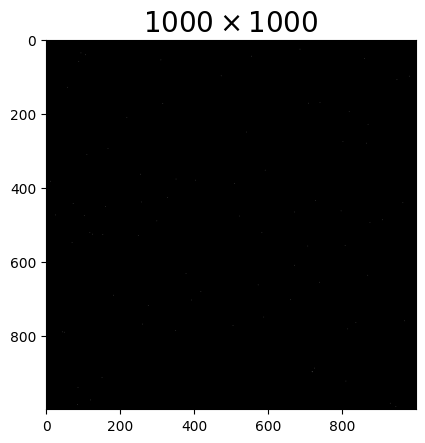

In [5]:
conf1 = coarse_graining(conf, 10)

m = np.mean(np.mean(conf1))
plt.imshow(conf1, cmap="binary", norm=norm)
plt.title(r"$1000 \times 1000$", fontsize = 20)

plt.show()

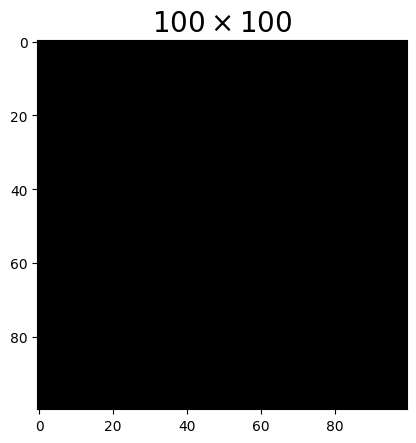

In [6]:
conf2 = coarse_graining(conf1, 10)

m = np.mean(np.mean(conf2))
plt.imshow(conf2, cmap="binary", norm=norm)
plt.title(r"$100 \times 100$", fontsize = 20)

plt.show()

<center>

# <span style="color:blue; font-size:50px;"> T = 3.0</span>

</center>

In [7]:
conf = np.loadtxt("cg/conf_t3.0.out")
m = np.mean(np.mean(conf))

print(f"La magnetizzazione è pari a: {round(m, 4)}")

La magnetizzazione è pari a: 0.0004


### Coarse graining

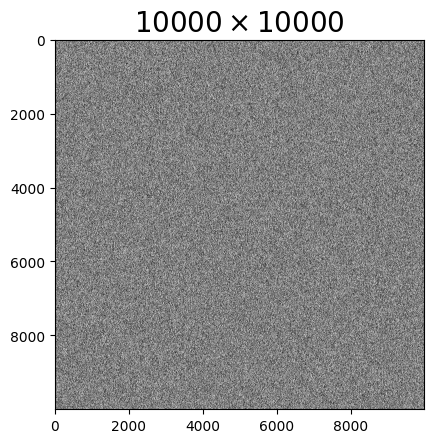

In [8]:
plt.imshow(conf, cmap="binary", norm=norm)
plt.title(r"$10000 \times 10000$", fontsize = 20)

plt.show()

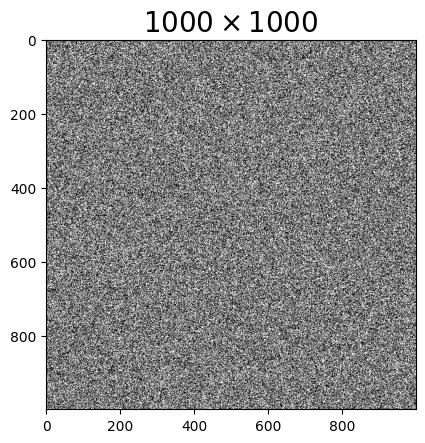

In [9]:
conf1 = coarse_graining(conf, 10)

m = np.mean(np.mean(conf1))
plt.imshow(conf1, cmap="binary", norm=norm)
plt.title(r"$1000 \times 1000$", fontsize = 20)

plt.show()

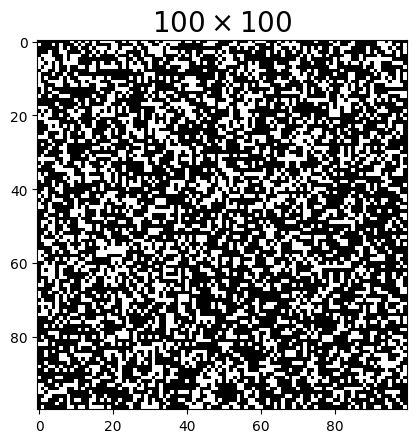

In [10]:
conf2 = coarse_graining(conf1, 10)

m = np.mean(np.mean(conf2))
plt.imshow(conf2, cmap="binary", norm=norm)
plt.title(r"$100 \times 100$", fontsize = 20)

plt.show()